## 01. 匯入模型

In [1]:
import cv2
import matplotlib.pyplot as plt

## 02. 使用Haar分類器辨識車牌

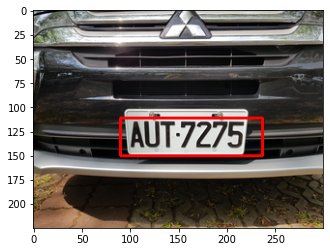

In [2]:
# 圖片位置
img_path = "resize064.bmp" 

# 讀取圖片
img = cv2.imread(img_path) 

# 讀取Haar分類器模型:車牌
detector = cv2.CascadeClassifier("haar_carplate.xml") 

# 給定分類器參數作預測，並回傳車牌的x, y, w, h
signs = detector.detectMultiScale(img, minSize = (76, 20), scaleFactor = 1.1, minNeighbors=10) 

# 繪矩形框出車牌位置
if len(signs) > 0:
    for (sx, sy, sw, sh) in signs:
        
        # 繪製矩形 (影像, 左上角, 右下角, 顏色, 線的粗度)
        cv2.rectangle(img, (sx, sy), (sx+sw, sy+sh), (0,0,255),2)
else:
    print("沒有辨識到車牌!")

# 繪圖
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 03. 提取號碼
01. 進行裁減影像，只保留車牌
02. 車牌轉為灰階並二值化，透過尋找輪廓方法框出輪廓
03. 設立條件式只保留是號碼的矩形

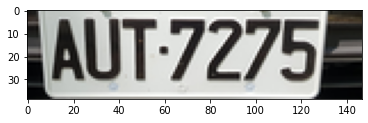

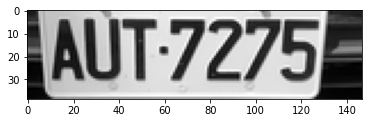

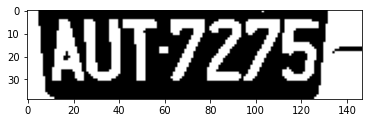

原本的輪廓的數量: 13
第0個輪廓位置： (58, 16, 4, 3)
第1個輪廓位置： (112, 4, 16, 27)
(被保留)
第2個輪廓位置： (95, 4, 16, 27)
(被保留)
第3個輪廓位置： (79, 4, 15, 27)
(被保留)
第4個輪廓位置： (63, 4, 15, 27)
(被保留)
第5個輪廓位置： (42, 4, 15, 27)
(被保留)
第6個輪廓位置： (25, 4, 16, 27)
(被保留)
第7個輪廓位置： (11, 4, 14, 27)
(被保留)
第8個輪廓位置： (15, 17, 5, 6)
第9個輪廓位置： (126, 0, 21, 39)
第10個輪廓位置： (133, 17, 3, 3)
第11個輪廓位置： (103, 0, 1, 1)
第12個輪廓位置： (0, 0, 12, 39)


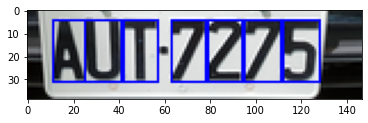

In [3]:
img = cv2.imread(img_path) 

# 根據 sx, sy, sw, sh來裁減影像
crop_img = img[sy:sy+sh, sx:sx+sw]

# 繪出裁剪後的影像
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.show()

# 轉成灰階
gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

# 繪出裁剪後的灰階影像
plt.imshow(gray_img, cmap="gray")
plt.show()

# 二值化
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)

# 繪出裁剪後的灰階經二值化的影像
plt.imshow(binary_img, cmap="gray")
plt.show()

# 輪廓偵測
contours, _ = cv2.findContours(binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("原本的輪廓的數量:", len(contours))

for i in range(len(contours)):
    (x, y, w, h) = cv2.boundingRect(contours[i])
    print("第%s個輪廓位置：" %(i),(x, y, w, h))
    
    if sw*(3/20)>w>sw*(0.5/20) and sh*(19.5/20)>h>sh*(12/20):
        cv2.rectangle(crop_img, (x, y), (x+w, y+h), (0,0,255),1)
        print("(被保留)")

plt.imshow(crop_img)
plt.show()

# 統整以上程式碼 

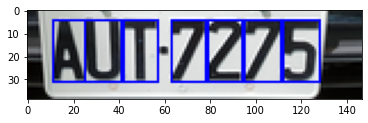

In [4]:
img_path = "resize064.bmp" 
img = cv2.imread(img_path) 

detector = cv2.CascadeClassifier("haar_carplate.xml")
signs = detector.detectMultiScale(img, minSize = (76, 20), scaleFactor = 1.1, minNeighbors=10)

if len(signs) > 0:
    for (sx, sy, sw, sh) in signs: 
        crop_img = img[sy:sy+sh, sx:sx+sw] 
        gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY) 
        _, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV) 
        contours, _ = cv2.findContours(binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

        for i in range(len(contours)): 
            (x, y, w, h) = cv2.boundingRect(contours[i]) 
            
            if sw*(3/20)>w>sw*(0.5/20) and sh*(19.5/20)>h>sh*(12/20):
                cv2.rectangle(crop_img, (x, y), (x+w, y+h), (0,0,255),1)
                
plt.imshow(crop_img)
plt.show()